# NA4AI - set1
**Author: Adriana Bukała**

**Index: 394064**

Let's start with loading some important packages. As this homework is for numerical analysis course, numpy is an obvious choice. We'd like to do some plotting as well, and we will use matplotlib for that.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now let's look and our data. We have dataset consisting of 100 points. First column corresponds with X axis, second - Y axis.

In [2]:
X = np.load('pts.npy')

In [3]:
X.shape

(100, 2)

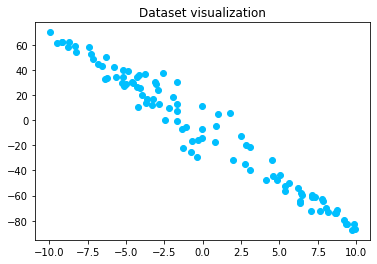

In [4]:
plt.scatter(X[:, 0], X[:, 1], c='deepskyblue')
plt.title('Dataset visualization')
plt.show()

## 1st task
We have to compute SVD algorithm on covariance matrix of X. Luckily, numpy has a specific function for that. Firstly, we will center our data.

In [5]:
mu = np.mean(X, axis=0)
mu

array([-0.1025569 , -6.42222282])

In [6]:
X_centered = X - mu

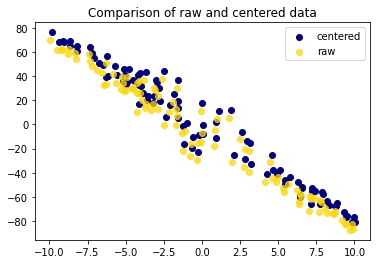

In [7]:
plt.scatter(X_centered[:, 0], X_centered[:, 1], label='centered', c='navy')
plt.scatter(X[:, 0], X[:, 1], label='raw', c='gold', alpha=0.75)
plt.legend()
plt.title('Comparison of raw and centered data')
plt.show()

Now we will compute column-wise covariance matrix and scale it by $n - 1$, where $n$ means number of points (100 in this case).

In [8]:
n = X_centered.shape[0]
C = np.dot(X_centered.T, X_centered) / (n - 1)

In [9]:
C.shape

(2, 2)

Finally, we can apply SVD on covariance matrix and plot results.

In [10]:
U, s, V = np.linalg.svd(C)

In [11]:
print(f'U: {str(U)}\n\ns: {str(s)}\n\nV: {str(V)}')

U: [[-0.12180274  0.99255433]
 [ 0.99255433  0.12180274]]

s: [2.13553671e+03 1.31379430e+00]

V: [[-0.12180274  0.99255433]
 [ 0.99255433  0.12180274]]


## 2nd task
Now we will implement page-rank algorithm. Let's present Markov Chain of pages as a matrix, where $l_{ij}=1$ means edge from $i$ to $j$, $l_{ij}=0$ - no edge.

In [12]:
n_variables = 7

In [13]:
L = np.array([
    [0, 1, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [1, 0, 0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 0],
    ])

To get probability we need to scale rows, and then we will transpose $L$, so we are consistent with method presented during lecture.

In [14]:
row_sums = L.sum(axis=1)
L = L / row_sums[:, np.newaxis]
L = L.T

In [15]:
L

array([[0.        , 0.25      , 0.        , 0.        , 0.33333333,
        0.        , 0.        ],
       [0.25      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.5       , 0.        ,
        0.33333333, 0.5       ],
       [0.        , 0.25      , 1.        , 0.        , 0.33333333,
        0.        , 0.        ],
       [0.25      , 0.25      , 0.        , 0.5       , 0.        ,
        0.33333333, 0.        ],
       [0.25      , 0.        , 0.        , 0.        , 0.33333333,
        0.        , 0.5       ],
       [0.25      , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        ]])

Let's define a helper function, as we will perform same algorithm a few times.

In [16]:
def rank_pages(markov_chain, iterations, ranks=None, silent=True):
    """Iteratively compute page ranks."""
    if ranks is None:
        n_variables = markov_chain.shape[0]
        ranks = np.random.random((n_variables, ))
    
    for i in range(iterations):
        ranks = np.dot(markov_chain, ranks)
        # normalize
        ranks = ranks / np.linalg.norm(ranks)
        
        if not silent:
            if i%5 == 0:
                print(f'{i}: {str(ranks)}')
    
    return ranks

We will start with setting all ranks to equal probability. We will iterate 100 times, and hopefully we will converge.

In [17]:
r = np.array([1 / n_variables for _ in range(n_variables)])
print(rank_pages(markov_chain=L, iterations=100, ranks=r, silent=False))

0: [0.19767387 0.08471737 0.53654337 0.53654337 0.451826   0.36710862
 0.19767387]
5: [0.17007352 0.03990855 0.47867649 0.67001129 0.45395085 0.26414957
 0.12485847]
10: [0.16360664 0.0421874  0.4935501  0.64860686 0.47235461 0.25900279
 0.13026593]
15: [0.16683375 0.04113323 0.48732735 0.65789644 0.46378842 0.26218662
 0.12773941]
20: [0.16540322 0.04160476 0.49007045 0.6538288  0.46759281 0.26076399
 0.12887503]
25: [0.16603505 0.04139692 0.48886506 0.65562428 0.46591837 0.2613934
 0.12837436]
30: [0.16575697 0.0414885  0.48939634 0.65483435 0.46665624 0.26111646
 0.12859502]
35: [0.16587948 0.04144818 0.48916245 0.65518239 0.46633135 0.26123849
 0.12849786]
40: [0.16582553 0.04146594 0.48926547 0.65502914 0.46647445 0.26118476
 0.12854065]
45: [0.16584929 0.04145811 0.48922011 0.65509664 0.46641143 0.26120843
 0.12852181]
50: [0.16583883 0.04146156 0.48924009 0.65506691 0.46643918 0.261198
 0.12853011]
55: [0.16584344 0.04146004 0.48923129 0.65508001 0.46642696 0.26120259
 0.1285264

It looks like we got convergence quite soon - that's nice! Now, let's try random initialization of ranks vector. As previously, we will iterate 100 times. We will repeat procedure 20 times, and check, if each initialization led to similar result.

In [18]:
for _ in range(20):
    r = rank_pages(markov_chain=L, iterations=100)
    print(r)

[0.16584202 0.04146051 0.48923398 0.655076   0.46643071 0.26120119
 0.12852757]
[0.16584202 0.04146051 0.48923398 0.655076   0.4664307  0.26120119
 0.12852757]
[0.16584203 0.04146051 0.48923397 0.65507601 0.46643069 0.26120119
 0.12852757]
[0.16584203 0.04146051 0.48923398 0.65507601 0.4664307  0.26120119
 0.12852757]
[0.16584203 0.0414605  0.48923397 0.65507602 0.46643068 0.2612012
 0.12852757]
[0.16584203 0.04146051 0.48923397 0.65507601 0.46643069 0.26120119
 0.12852757]
[0.16584203 0.04146051 0.48923398 0.655076   0.4664307  0.26120119
 0.12852757]
[0.16584203 0.04146051 0.48923397 0.65507601 0.46643069 0.26120119
 0.12852757]
[0.16584203 0.04146051 0.48923398 0.65507601 0.4664307  0.26120119
 0.12852757]
[0.16584203 0.04146051 0.48923397 0.65507601 0.46643069 0.26120119
 0.12852757]
[0.16584203 0.04146051 0.48923397 0.65507601 0.46643069 0.26120119
 0.12852757]
[0.16584202 0.04146051 0.48923399 0.65507598 0.46643072 0.26120118
 0.12852758]
[0.16584203 0.0414605  0.48923396 0.65507

We got convergence once again! Since all rank vectors are similar, we will simply use last one in the next steps.

In [19]:
print(f'Final ranks:\n{str(r)}')

Final ranks:
[0.16584203 0.04146051 0.48923397 0.65507601 0.46643069 0.26120119
 0.12852757]


Finally, let's compute eigenvectors of $L$ and compare first vector to previously computed ranks.

In [20]:
eigvals, eigvecs = np.linalg.eig(L)

In [21]:
print(f'First eigenvector of L:\n{str(eigvecs[:, 0])}')

First eigenvector of L:
[0.16584203+0.j 0.04146051+0.j 0.48923398+0.j 0.655076  +0.j
 0.4664307 +0.j 0.26120119+0.j 0.12852757+0.j]


In [22]:
print(f'Ranks / eigenvector1 ratio:\n{str(r / eigvecs[:, 0])}')

Ranks / eigenvector1 ratio:
[1.00000002+0.j 0.99999998+0.j 0.99999999+0.j 1.00000001+0.j
 0.99999998+0.j 1.00000001+0.j 0.99999998+0.j]


Looks like our computed ranks converge to the first eigenvector!

## 3rd task
We will compute some numerical derivatives. Starting with importing helper function, and defining mentioned functions.

In [23]:
from itertools import product

In [24]:
def f1(x, y):
    return -((x**2) / 4) - ((y**2) / 4) + 2

In [25]:
def f2(x, y):
    return 1 / (1 + np.exp(-x - y))

In [26]:
def derivative(f, vs, h, direction):
    """Compute a partial numerical derivative."""
    x, y = vs[:, 0], vs[:, 1]
    
    if direction == 'x':
        return (f(x + h, y) - f(x, y)) / h
    elif direction == 'y':
        return (f(x, y + h) - f(x, y)) / h
    else:
        raise Exception('Direction should be x or y.')

We will randomly generate 500 values for $x$ and $y$, and then create a cartesian product of these two lists. $h$ value will be set to 1/500 as defined in task.

In [27]:
xs = np.linspace(-5, 5, num=500)
ys = np.linspace(-5, 5, num=500)
vs = np.array([np.array([z1, z2]) for z1, z2 in product(xs, ys)])
h = 1 / 500

Now we will create a matrix of computed derivatives, and take a look at data, i.e. its mean value.

In [28]:
dx = np.array([derivative(f1, vs, h, 'x'), derivative(f2, vs, h, 'x')]).T

dy = np.array([derivative(f1, vs, h, 'y'), derivative(f2, vs, h, 'y')]).T

In [29]:
print(f'Shape of vector of derivatives with respect to x: {dx.shape}')
print(f'Shape of vector of derivatives with respect to y: {dy.shape}')

Shape of vector of derivatives with respect to x: (250000, 2)
Shape of vector of derivatives with respect to y: (250000, 2)


In [30]:
print((f'Values of derivatives with respect to x:\n'
      f'min: {np.min(dx):.6f}, max: {np.max(dx):.6f}, mean: {np.mean(dx):.6f}\n'))

print((f'Values of derivatives with respect to y:\n'
      f'min: {np.min(dy):.6f}, max: {np.max(dy):.6f}, mean: {np.mean(dy):.6f}'))

Values of derivatives with respect to x:
min: -2.500500, max: 2.499500, mean: 0.042747

Values of derivatives with respect to y:
min: -2.500500, max: 2.499500, mean: 0.042747


In [31]:
print((f'Values of derivatives with respect to x for f1:\n'
      f'min: {np.min(dx[:, 0]):.6f}, max: {np.max(dx[:, 0]):.6f}, mean: {np.mean(dx[:, 0]):.6f}\n'))

print((f'Values of derivatives with respect to y for f1:\n'
      f'min: {np.min(dy[:, 0]):.6f}, max: {np.max(dy[:, 0]):.6f}, mean: {np.mean(dy[:, 0]):.6f}\n'))

print((f'Values of derivatives with respect to x for f2:\n'
      f'min: {np.min(dx[:, 1]):.6f}, max: {np.max(dx[:, 1]):.6f}, mean: {np.mean(dx[:, 1]):.6f}\n'))

print((f'Values of derivatives with respect to y for f2:\n'
      f'min: {np.min(dy[:, 1]):.6f}, max: {np.max(dy[:, 1]):.6f}, mean: {np.mean(dy[:, 1]):.6f}\n'))


Values of derivatives with respect to x for f1:
min: -2.500500, max: 2.499500, mean: -0.000500

Values of derivatives with respect to y for f1:
min: -2.500500, max: 2.499500, mean: -0.000500

Values of derivatives with respect to x for f2:
min: 0.000045, max: 0.250000, mean: 0.085994

Values of derivatives with respect to y for f2:
min: 0.000045, max: 0.250000, mean: 0.085994



## 4th task
Now, we will set $y$ to 1, and compute derivatives once again. We will use previously generated $x$ values.

In [32]:
vs2 = np.array([np.array([x, 1]) for x in xs])

In [33]:
dx2 = np.array([derivative(f1, vs2, h, 'x'), derivative(f2, vs2, h, 'x')]).T

To check, how accurate our approximation is, we will computed symbolic derivatives by hand, and now define them as python functions.

In [34]:
def df1(x):
    return -x / 2

In [35]:
def df2(x):
    return (np.exp(-x - 1) / (1 + np.exp(-x - 1))**2)

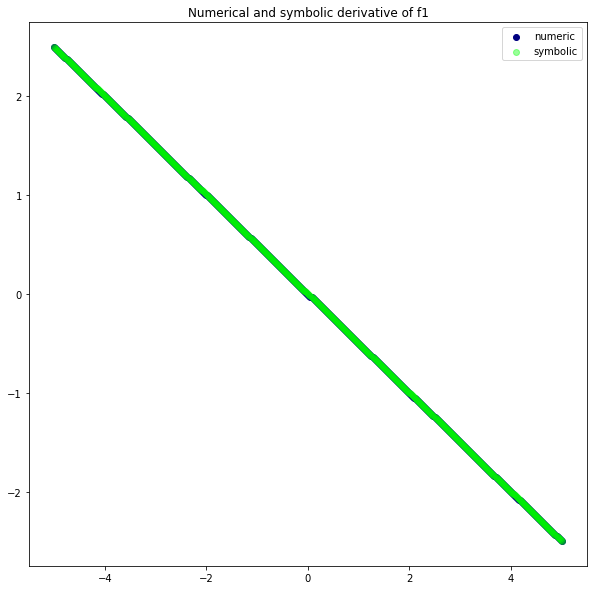

In [36]:
plt.figure(figsize=(10, 10))
plt.scatter(xs, dx2[:, 0], c='navy', label='numeric')
plt.scatter(xs, df1(xs), c='lime', alpha=0.4, label='symbolic')
plt.legend()
plt.title('Numerical and symbolic derivative of f1')
plt.show()

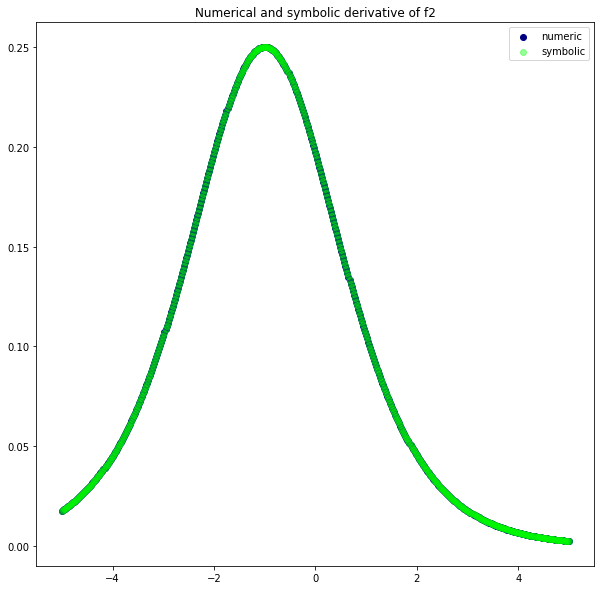

In [37]:
plt.figure(figsize=(10, 10))
plt.scatter(xs, dx2[:, 1], c='navy', label='numeric')
plt.scatter(xs, df2(xs), c='lime', alpha=0.4, label='symbolic')
plt.legend()
plt.title('Numerical and symbolic derivative of f2')
plt.show()

Looks like our numerical approximation was quite good!